In [1]:
# coding=utf-8

# Copyright 2015 and onwards Sanford Ryza, Uri Laserson, Sean Owen and Joshua Wills
#
# See LICENSE file for further information.

# this code assumes you are working from an interactive Thunder (PySpark) shell

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import thunder as td
%matplotlib inline
##################
# data exploration
##################

In [2]:
# load some zebrafish brain data
data = td.images.fromtif('data/tif-stack', engine=sc)

In [3]:
type(data)

thunder.images.images.Images

In [4]:
# explore the resulting object
print(data)

Images
mode: spark
dtype: uint8
shape: (20, 2, 76, 87)


In [5]:
print(data.values)

BoltArray
mode: spark
shape: (20, 2, 76, 87)



In [6]:
print(data.values.first())

[[[26 26 26 ... 26 26 26]
  [26 26 26 ... 26 26 26]
  [26 26 26 ... 27 27 26]
  ...
  [26 26 26 ... 27 27 26]
  [26 26 26 ... 27 26 26]
  [25 25 25 ... 26 26 26]]

 [[25 25 25 ... 26 26 26]
  [25 25 25 ... 26 26 26]
  [26 26 26 ... 26 26 26]
  ...
  [26 26 26 ... 26 26 26]
  [26 26 26 ... 26 26 26]
  [25 25 25 ... 26 26 26]]]


In [7]:
print(data.values._rdd)

PythonRDD[3] at RDD at PythonRDD.scala:48


In [8]:
print(data.values._rdd.first())

((0,), array([[[26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 27, 27, 26],
        ...,
        [26, 26, 26, ..., 27, 27, 26],
        [26, 26, 26, ..., 27, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]],

       [[25, 25, 25, ..., 26, 26, 26],
        [25, 25, 25, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        ...,
        [26, 26, 26, ..., 26, 26, 26],
        [26, 26, 26, ..., 26, 26, 26],
        [25, 25, 25, ..., 26, 26, 26]]], dtype=uint8))


In [9]:
print(data.shape)

(20, 2, 76, 87)


In [10]:
print(data.count())

20


In [11]:
# plot the raw data
img = data.first()

In [12]:
print(img.shape, type(img))

(2, 76, 87) <class 'numpy.ndarray'>


In [13]:
img[0,:,:]

array([[26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 26, 26, 26],
       [26, 26, 26, ..., 27, 27, 26],
       ...,
       [26, 26, 26, ..., 27, 27, 26],
       [26, 26, 26, ..., 27, 26, 26],
       [25, 25, 25, ..., 26, 26, 26]], dtype=uint8)

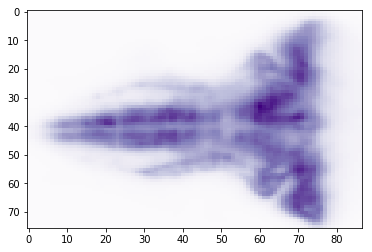

In [14]:
plt.imshow(img[0,:,:], interpolation='nearest', aspect='auto', cmap='Purples')

(20, 2, 16, 18)


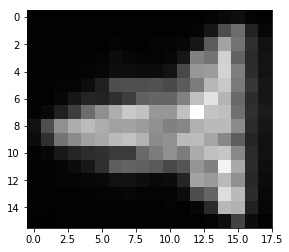

In [15]:
# plot subsampled data
subsampled = data.subsample((1, 5, 5))
plt.imshow(subsampled.first()[0, : ,:], interpolation='nearest', aspect='equal', cmap='gray')
print(subsampled.shape)

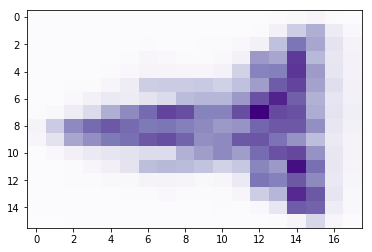

In [16]:
plt.imshow(subsampled.first()[0, : ,:], interpolation='nearest', aspect='auto', cmap='Purples')

In [17]:
# reshuffle data to series representation
series = data.toseries()
print(type(series))

<class 'thunder.series.series.Series'>


In [18]:
print(series.shape)
print(series.index)
print(series.count())
print(series.values._rdd.takeSample(False, 1)[0])
print(series.max().values)

(2, 76, 87, 20)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
13224
((0, 54, 68), array([103, 103, 104, 103, 103, 103, 104, 104, 104, 104, 103, 104, 107,
       109, 110, 110, 110, 109, 109, 109], dtype=uint8))
[[[[158 152 145 143 142 141 140 140 139 139 140 140 142 144 153 168 179
    185 185 182]]]]


In [19]:
print(series.values._rdd.first())
print(series.values._rdd.top(1))
print(data.shape)

((0, 0, 0), array([26, 26, 26, 26, 26, 26, 26, 25, 26, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26], dtype=uint8))
[((1, 75, 86), array([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 26], dtype=uint8))]
(20, 2, 76, 87)


In [20]:
print(type(series.min()),series.min().values)

<class 'thunder.series.series.Series'> [[[[25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25 25]]]]


In [21]:
stddev = series.map(lambda s:s.std())

In [22]:
print(type(stddev),type(stddev.values),type(stddev.value_shape))
print(stddev)
print(stddev.values)
print(stddev.value_shape)

<class 'thunder.series.series.Series'> <class 'bolt.spark.array.BoltArraySpark'> <class 'tuple'>
Series
mode: spark
dtype: float64
shape: (2, 76, 87, 1)
BoltArray
mode: spark
shape: (2, 76, 87, 1)

(1,)


In [23]:
print(stddev.values._rdd.take(3))

[((0, 0, 0), array([0.4])), ((0, 0, 1), array([0.35707142])), ((0, 0, 2), array([0.45825757]))]


In [24]:
repacked = stddev.toarray()
print(type(repacked), repacked.shape)

<class 'numpy.ndarray'> (2, 76, 87)


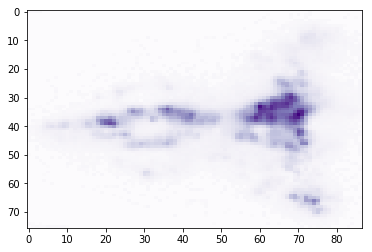

In [25]:
plt.imshow(repacked[0, : ,:], interpolation='nearest', aspect='auto', cmap='Purples')

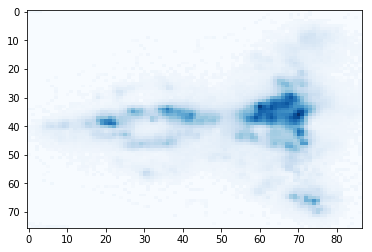

In [26]:
plt.imshow(repacked[0, : ,:], interpolation='nearest', aspect='auto', cmap='Blues')

In [27]:
print(series.mean().values)
print(series.std().values)
print(series.toarray().shape)
print(series.center().shape)

[[[[53.83272837 53.72640653 53.55096794 53.19971264 53.10949788
    52.9796582  52.78871748 52.66855717 52.56170599 52.51149425
    52.41757411 52.78433152 53.15683606 53.55784936 53.88150333
    54.23812765 54.4126588  54.50642771 54.49485783 54.40154265]]]]
[[[[32.09861496 31.90533267 31.66028804 31.22154792 31.1035187
    30.94402173 30.7526548  30.6247292  30.51473572 30.47730585
    30.38448685 30.76637435 31.19972631 31.68788223 32.11323135
    32.57638789 32.8279617  32.97477387 32.9603348  32.80253554]]]]
(2, 76, 87, 20)
(2, 76, 87, 20)


In [28]:
series.sample(seed=1)

Series
mode: local
dtype: uint8
shape: (100, 20)

In [29]:
print(series.center().toarray()[0,:,:].shape)

(76, 87, 20)


In [30]:
print(series.center().sample(50, seed=1).toarray().shape)

(50, 20)


In [31]:
print(series.center().sample(50, seed=1).toarray().T.shape)

(20, 50)


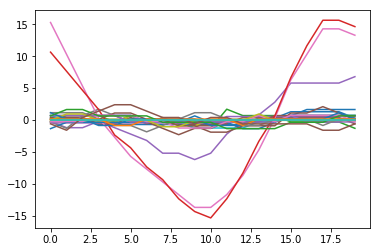

In [32]:
plt.plot(series.center().sample(50, seed=1).toarray().T)
plt.show()

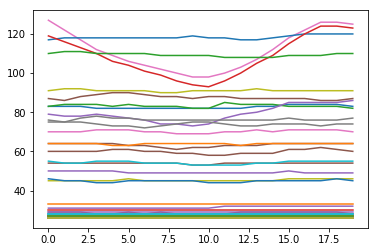

In [33]:
plt.plot(series.sample(50, seed=1).toarray().T)
plt.show()

In [34]:
images = td.images.frombinary('data/fish-long', order='F',engine=sc)
image_series = images.toseries()
print(image_series.shape)

(76, 87, 2, 240)


In [35]:
print(image_series.sample(1,seed=1).values)

[[81. 82. 82. 82. 83. 84. 85. 84. 84. 83. 82. 83. 87. 89. 91. 91. 91. 91.
  91. 91. 91. 88. 85. 83. 82. 81. 81. 81. 83. 82. 80. 82. 86. 90. 92. 94.
  95. 96. 97. 98. 97. 92. 87. 86. 85. 85. 84. 83. 82. 81. 81. 84. 87. 89.
  92. 93. 93. 93. 93. 94. 95. 92. 87. 84. 82. 82. 81. 80. 80. 79. 79. 83.
  87. 90. 92. 93. 95. 95. 95. 95. 96. 92. 88. 84. 81. 80. 79. 80. 80. 79.
  78. 82. 86. 90. 93. 96. 97. 99. 99. 99. 98. 92. 88. 86. 84. 82. 79. 78.
  78. 79. 78. 81. 86. 92. 94. 94. 93. 91. 91. 91. 91. 86. 82. 80. 80. 80.
  79. 79. 78. 78. 78. 83. 88. 89. 88. 89. 88. 88. 88. 87. 88. 86. 84. 83.
  81. 80. 80. 82. 83. 83. 83. 86. 88. 89. 88. 87. 87. 88. 89. 89. 88. 84.
  83. 81. 82. 84. 84. 83. 83. 83. 84. 85. 87. 86. 85. 84. 83. 83. 83. 84.
  84. 82. 81. 82. 84. 85. 85. 83. 83. 83. 84. 85. 84. 82. 81. 81. 82. 83.
  83. 82. 80. 80. 83. 84. 83. 84. 84. 85. 84. 82. 81. 79. 78. 79. 79. 79.
  79. 79. 79. 79. 79. 79. 79. 80. 80. 81. 81. 82. 81. 81. 80. 78. 78. 79.
  80. 79. 78. 78. 79. 80.]]


In [36]:
normalized = image_series.normalize(method='mean')

In [37]:
stddevs = normalized.map(lambda s:s.std()).sample(1000, seed=1)

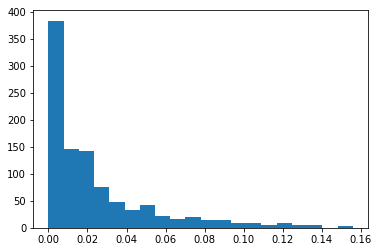

In [38]:
plt.hist(stddevs.values,bins=20)
plt.show()

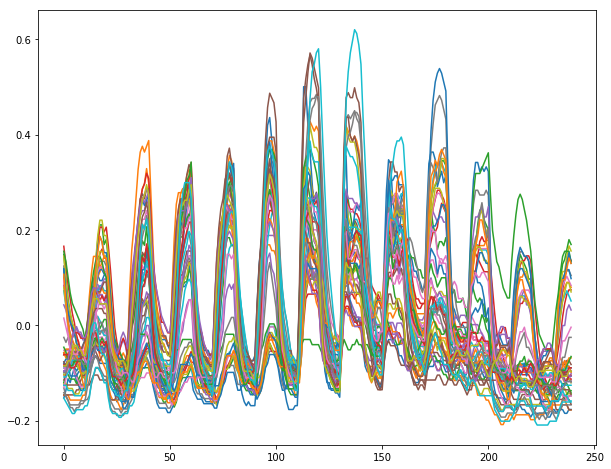

In [39]:
plt.figure(figsize=(10,8))
plt.plot(normalized.filter(lambda x:x.std() >=0.1).sample(50, seed=1).toarray().T)
plt.show()

In [40]:
from pyspark.mllib.clustering import KMeans

In [41]:
normalized.cache()

Series
mode: spark
dtype: float16
shape: (76, 87, 2, 240)

In [42]:
ks = [5, 10, 15, 20, 30, 50, 100, 200]
models = []
for k in ks:
    models.append(KMeans.train(normalized.values._rdd.values(), k))

In [51]:
def model_error_1(model):
    def series_error(sr):
        cluster_id = model.predict(sr)
        center = model.centers[cluster_id]
        diff = center - sr
        return diff.dot(diff) ** 0.5
    return (normalized.map(series_error).toarray().sum())

def model_error_2(model):
    return model.computeCost(normalized.values._rdd.values())

In [52]:
print(model_error_1(models[0]))
print(model_error_2(models[0]))

3193.0871498271845
1365.2694913936418


In [53]:
import numpy as np

In [61]:
error_1 = np.asarray(list(map(model_error_1,models)))

In [62]:
error_2 = np.asarray(list(map(model_error_2,models)))

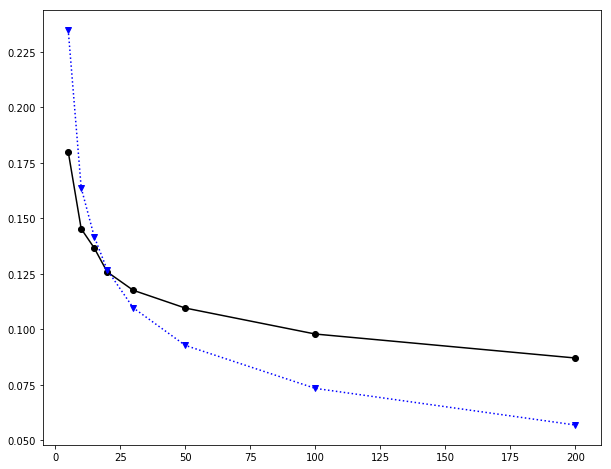

In [64]:
plt.figure(figsize=(10,8))
plt.plot(ks, error_1/error_1.sum(), 'k-o',
         ks, error_2/error_2.sum(), 'b:v')
plt.show()

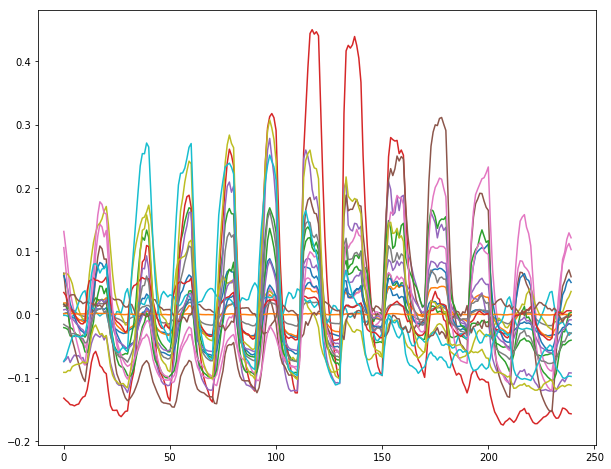

In [67]:
# plot the best performing model
plt.figure(figsize=(10,8))
model20 = models[3]
plt.plot(np.asarray(model20.centers).T)
plt.show()

In [70]:
# finally, plot each brain region according to its characteristic behavior
from matplotlib.colors import ListedColormap
cmap_cat = ListedColormap(sns.color_palette("hls", 10), name='from_list')
by_cluster = normalized.map(lambda s: model20.predict(s)).toarray()

In [82]:
print(normalized.values)
print(normalized.values.first())

BoltArray
mode: spark
shape: (76, 87, 2, 240)

[ 0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195
  0.00663 -0.03195 -0.03195 -0.03195  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663  0.00663  0.00663
 -0.03195 -0.03195  0.00663  0.00663  0.00663 -0.03195 -0.03195  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663  0.00663
 -0.03195  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663
 -0.03195 -0.03195 -0.03195  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195  0.00663  0.00663
  0.00663  0.00663  0.00663 -0.03195  0.00663 -0.03195  0.00663  0.00663
  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663  0.00663 -0.03195
 -0.

In [76]:
print(normalized.values.shape,by_cluster.shape)

(76, 87, 2, 240) (76, 87, 2)


In [83]:
print(by_cluster)

[[[11 11]
  [ 7 11]
  [ 7 11]
  ...
  [11 11]
  [11 11]
  [11 11]]

 [[11 11]
  [11 11]
  [11 11]
  ...
  [11 11]
  [11 11]
  [11 11]]

 [[11 11]
  [11 11]
  [11 11]
  ...
  [11 11]
  [ 7 11]
  [11 11]]

 ...

 [[11 11]
  [11 11]
  [11 11]
  ...
  [11 11]
  [11 11]
  [11 11]]

 [[ 7 11]
  [11 11]
  [11 11]
  ...
  [ 7 11]
  [11 11]
  [11 11]]

 [[11 11]
  [11 11]
  [ 7 11]
  ...
  [11 11]
  [11 11]
  [11 11]]]


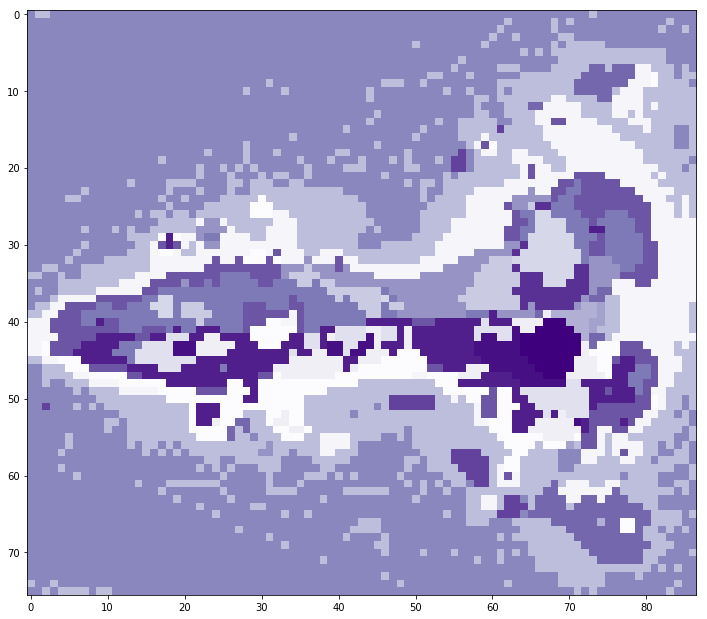

In [86]:
plt.figure(figsize=(12,12))
plt.imshow(by_cluster[:, :, 0], interpolation='nearest',
    aspect='equal', cmap='Purples')
plt.show()

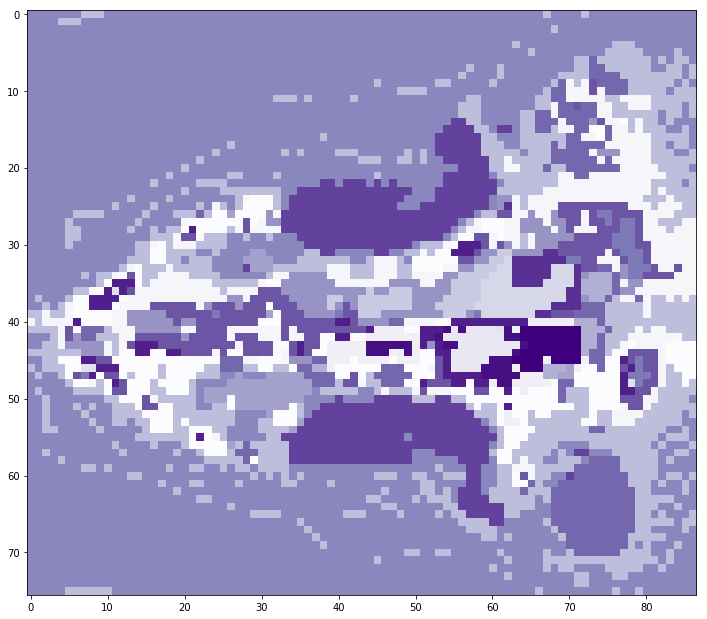

In [87]:
plt.figure(figsize=(12,12))
plt.imshow(by_cluster[:, :, 1], interpolation='nearest',
    aspect='equal', cmap='Purples')
plt.show()